In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fmin

In [2]:
def likelihood(a,x):
    """
    Function to calculate the likelihood.
    
    Parameters
    ----------
    rule_in_decimal: int
        Posivite integer that specifies the decimal number.

    Returns
    -------
    rule_in_ternary: int
        The ternary representation of the input number.
    """
    length = len(x)
    normalization = np.sqrt(np.log(a)/2/np.pi)**length
    return (normalization * a**(-0.5*sum(x**2)))

In [3]:
def prior(a):
    return np.random.uniform(1,10)

In [4]:
def calc_posterior(a,x):
    return likelihood(a,x)*prior(a)

In [5]:
data = np.random.randn(100)

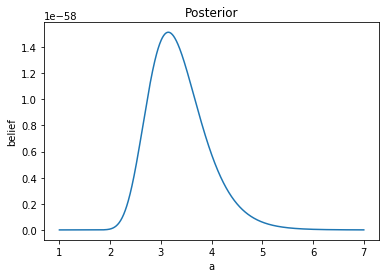

3.144144144144144


In [6]:
ax = plt.subplot()
x = np.linspace(1, 7, 1000)
posterior = calc_posterior(x,data)
ax.plot(x, posterior)
ax.set(xlabel='a', ylabel='belief', title='Posterior')

max_y = max(posterior)
max_x = x[posterior.argmax()]
#plt.text(max_x, max_y, str((max_x, max_y))) 
plt.show()
print (max_x)

In [7]:
def sampler(data, samples, mu_init=5, proposal_width=.25):
    mu_current = mu_init
    parameter = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = calc_posterior(mu_current,data)
        likelihood_proposal = calc_posterior(mu_proposal,data)
        
        # Compute prior probability of current and proposed mu        
        prior_current = prior(mu_current)
        prior_proposal = prior(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        parameter.append(mu_current)
        
    return np.array(parameter)

In [8]:
parameter = sampler(data, samples=15000, mu_init=5)

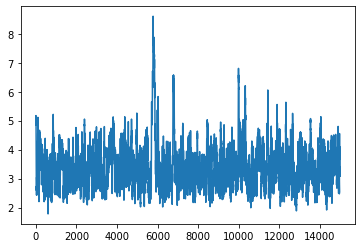

In [9]:
plt.plot(parameter)

In [10]:
np.mean(parameter)

3.4076888117803485

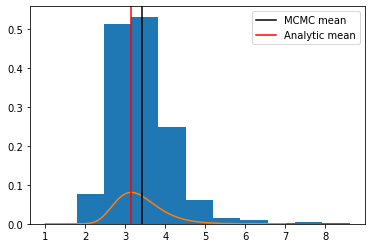

In [26]:
plt.hist(parameter,density=True)
plt.plot(x,posterior/np.sqrt(np.sum(posterior**2)))
plt.axvline(x=np.mean(parameter), color='k',label="MCMC mean")
plt.axvline(x=x[posterior.argmax()], color='r', label="Analytic mean" )
plt.legend()
plt.show()